Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
import pandas as pd
import numpy as np



In [25]:
# import CSVs from previous notebooks
bikes_df = pd.read_csv('bikes_df.csv')
Cineplex_Theatres = pd.read_csv('Cineplex_Theatres.csv')
Yelp_Cineplex_Theatres = pd.read_csv('Yelp_Cineplex_Theatres.csv')

In [26]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [27]:
db_path = r'C:\Users\adesi\Statistical-Modelling-Project_LHL\new.db'

# Create a connection to the SQLite database
connection = sqlite3.connect(db_path)


In [35]:
# Data from stations
bikes_df.to_sql('bikes_df', connection, if_exists='replace', index=False)

248

In [36]:
# Data from Cinema dataframe
Cineplex_Theatres.to_sql('Cineplex_Theatres', connection, if_exists='replace',index=False)

333

In [37]:
# A cursor is an object that provides a way to interact with the database
cursor = connection.cursor()


In [38]:
bikes_df = bikes_df.rename(columns={'Latitude': 'bike_latitude',
                                              'Longitude': 'bike_longitude'})

In [39]:
# Latitude and longitude column in both dataframes
Cineplex_Theatres = Cineplex_Theatres.rename(columns={'Latitude': 'cine_latitude',
                                              'Longitude': 'cine_longitude'})

Executing query: 
         SELECT b.*, ct.*
                FROM bikes_df AS b
                JOIN Cineplex_Theatres AS ct
                ON (
                    ((ct.cine_latitude - b.bike_latitude) * (ct.cine_latitude - b.bike_latitude) +
                    (ct.cine_longitude - b.bike_longitude) * (ct.cine_longitude - b.bike_longitude)) <= (1.0 / 111.32) * (1.0 / 111.32)
                )
            
Number of rows fetched: 7026
         Station Name  bike_latitude  bike_longitude  Bikes Available  \
0       10th & Cambie      49.262487     -123.114397               20   
1       10th & Cambie      49.262487     -123.114397               20   
2       10th & Cambie      49.262487     -123.114397               20   
3       10th & Cambie      49.262487     -123.114397               20   
4       10th & Cambie      49.262487     -123.114397               20   
...               ...            ...             ...              ...   
7021  Beatty & Robson      49.277773     -123.114

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [51]:
result_df = pd.DataFrame(results, columns=[column[0] for column in cursor.description])

In [52]:
result_df

,Station Name,bike_latitude,bike_longitude,Bikes Available,cine_latitude,cine_longitude,name,distance,address,telephone,rating,open_true
0,10th & Cambie,49.262487,-123.114397,20,49.263025,-123.113913,Pacific Ballet Theatre School,69,"456 Broadway W, Vancouver BC V5Y 1R3",(604) 873-5024,NaN,0
1,10th & Cambie,49.262487,-123.114397,20,49.254508,-123.114891,Cineplex Inc,887,"3440 Cambie St, Vancouver BC V5Z 2W8",(604) 709-3456,NaN,0
2,10th & Cambie,49.262487,-123.114397,20,49.263025,-123.113913,Pacific Ballet Theatre School,271,"456 Broadway W, Vancouver BC V5Y 1R3",(604) 873-5024,NaN,0
3,10th & Cambie,49.262487,-123.114397,20,49.254508,-123.114891,Cineplex Inc,684,"3440 Cambie St, Vancouver BC V5Z 2W8",(604) 709-3456,NaN,0
4,10th & Cambie,49.262487,-123.114397,20,49.263025,-123.113913,Pacific Ballet Theatre School,309,"456 Broadway W, Vancouver BC V5Y 1R3",(604) 873-5024,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Beatty & Robson,49.277773,-123.114237,6,49.280419,-123.106959,Cineplex Inc,545,"88 West Pender, Vancouver BC V6B 6N9",(604) 806-0799,NaN,0
7022,Beatty & Robson,49.277773,-123.114237,6,49.281089,-123.112776,Vancouver Civic Theatres,967,"600 Hamilton St, Vancouver BC V6B 3L4",(604) 665-3050,NaN,0
7023,Beatty & Robson,49.277773,-123.114237,6,49.280300,-123.106705,Cineplex Cinemas,609,"88 W Pender St (btwn Abbott & Carrall), Vancou...",(604) 806-0799,6.7,0
7024,Beatty & Robson,49.277773,-123.114237,6,49.282767,-123.109268,Kokoro Dance Theatre Society,661,"207 Hastings St W, Vancouver BC V6B 1H7",(604) 662-7441,NaN,1


In [65]:
result_df.to_csv('result_df.csv', index=False)

In [53]:
result_df.describe()

,bike_latitude,bike_longitude,Bikes Available,cine_latitude,cine_longitude,distance,rating,open_true
count,7026.000000,7026.000000,7026.000000,7026.000000,7026.000000,7026.000000,1673.000000,7026.000000
mean,49.277380,-123.120403,10.393254,49.277438,-123.119922,637.384002,7.474118,0.322659
std,0.008137,0.012649,5.560901,0.007352,0.012279,254.116147,0.654223,0.467527
min,49.249184,-123.170661,0.000000,49.254508,-123.162527,35.000000,6.700000,0.000000
25%,49.273833,-123.124697,6.000000,49.276798,-123.124201,452.000000,6.700000,0.000000
50%,49.279739,-123.117772,11.000000,49.280570,-123.119384,673.000000,7.600000,0.000000
75%,49.282759,-123.112543,13.000000,49.281878,-123.112106,865.000000,8.100000,1.000000
max,49.290112,-123.099917,28.000000,49.283694,-123.106705,1008.000000,8.200000,1.000000


In [56]:
print(bikes_df.columns)

Index(['Station Name', 'bike_latitude', 'bike_longitude', 'Bikes Available'], dtype='object')


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [44]:
try:
    # create a cursor object to execute SQL queries
    cursor = connection.cursor()

    # Execute the spatial join SQL query
    query = """
         SELECT b.*, ct.*
                FROM bikes_df AS b
                JOIN Cineplex_Theatres AS ct
                ON (
                    ((ct.cine_latitude - b.bike_latitude) * (ct.cine_latitude - b.bike_latitude) +
                    (ct.cine_longitude - b.bike_longitude) * (ct.cine_longitude - b.bike_longitude)) <= (1.0 / 111.32) * (1.0 / 111.32)
                )
            """
    print("Executing query:", query)

    # Fetch the results
    cursor.execute(query)
    results = cursor.fetchall()

    # Print the number of rows fetched
    print("Number of rows fetched:", len(results))

    # Check if there are results
    if results:
        # Create a DataFrame with the results
        result_df = pd.DataFrame(results, columns=[column[0] for column in cursor.description])
        print(result_df)
    else:
        print("No matching rows found.")

except sqlite3.Error as e:
    print(f"SQLite error: {e}")

Executing query: 
         SELECT b.*, ct.*
                FROM bikes_df AS b
                JOIN Cineplex_Theatres AS ct
                ON (
                    ((ct.cine_latitude - b.bike_latitude) * (ct.cine_latitude - b.bike_latitude) +
                    (ct.cine_longitude - b.bike_longitude) * (ct.cine_longitude - b.bike_longitude)) <= (1.0 / 111.32) * (1.0 / 111.32)
                )
            
Number of rows fetched: 7026
         Station Name  bike_latitude  bike_longitude  Bikes Available  \
0       10th & Cambie      49.262487     -123.114397               20   
1       10th & Cambie      49.262487     -123.114397               20   
2       10th & Cambie      49.262487     -123.114397               20   
3       10th & Cambie      49.262487     -123.114397               20   
4       10th & Cambie      49.262487     -123.114397               20   
...               ...            ...             ...              ...   
7021  Beatty & Robson      49.277773     -123.114

Text(0.5, 1.0, 'Ratings')

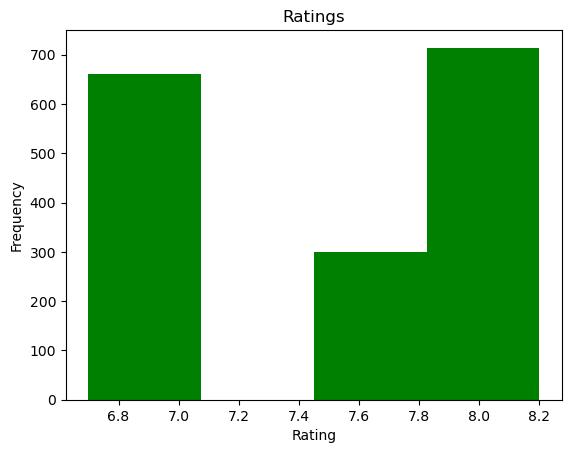

In [64]:
# Ratings
plt.hist(result_df['rating'], bins=4, color='green')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings')
